# Présentation de la recherche 

## Benchmarking et Analyse Expérimentale des Algorithmes et Modèles de l'IA

### ETAPE 1 

In [1]:
#### 2.3 Choix d'un algorithme

L'algorithme que nous avons choisi dans cette étape est ***CMA-ES (Covariance Matrix Adaptation Evolution Strategy).***

##### Qu'est ce que CMAES ?

CMA-ES est un algorithme d'optimisation évolutif basé sur une stratégie d'évolution. Il est particulièrement efficace pour résoudre des problèmes d'optimisation non linéaires, continus et sans gradient.
Il fonctionne comme suit : 
- Initialisation :
        L'algorithme commence avec une population initiale d'individus générés aléatoirement.
        Une distribution gaussienne est utilisée pour définir les solutions candidates.
- Évaluation et sélection :
        Chaque individu est évalué en fonction de la fonction objectif.
        Les meilleurs individus sont sélectionnés pour guider l'évolution.
- Adaptation de la covariance :
        Contrairement aux algorithmes évolutionnaires classiques, CMA-ES ajuste dynamiquement la matrice de covariance.
        Cela permet d'adapter la direction et l'amplitude des mutations en fonction de la topologie du paysage de la fonction.
- Nouvelle génération :
    De nouvelles solutions sont échantillonnées à partir de la distribution mise à jour.
    Le processus est répété jusqu'à convergence ou un critère d'arrêt prédéfini.

#### 5. Visualisation des résultats de l'exécutetion de CMA-ES sur un ensemble de données.

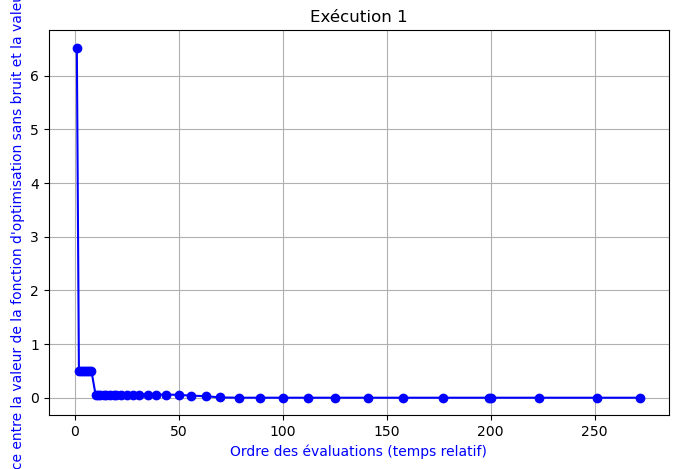

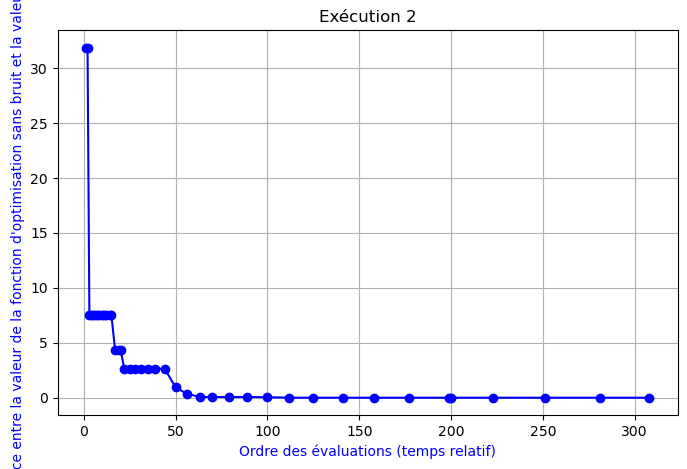

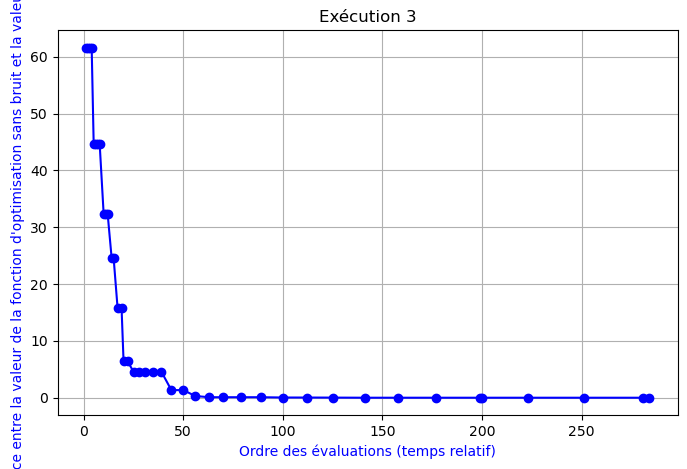

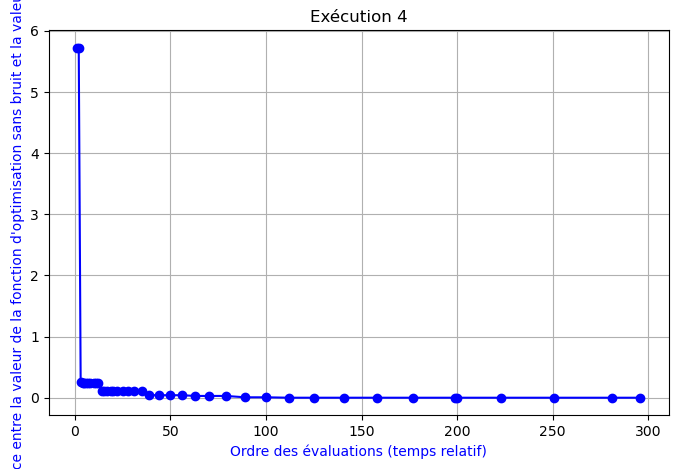

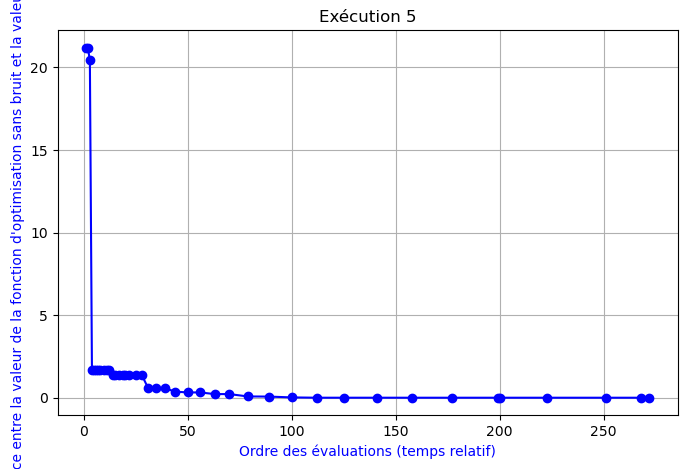

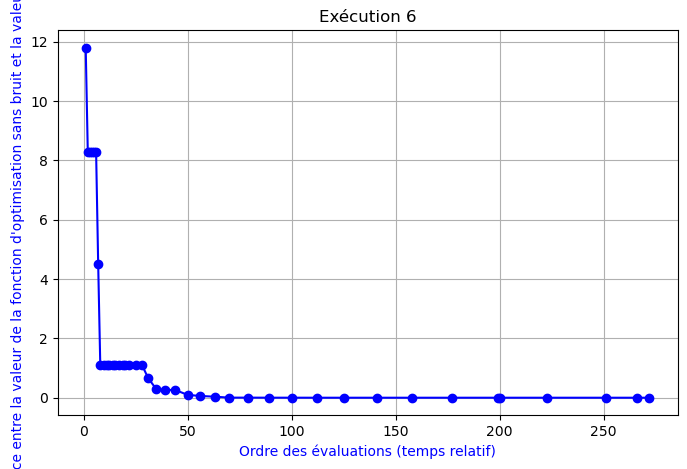

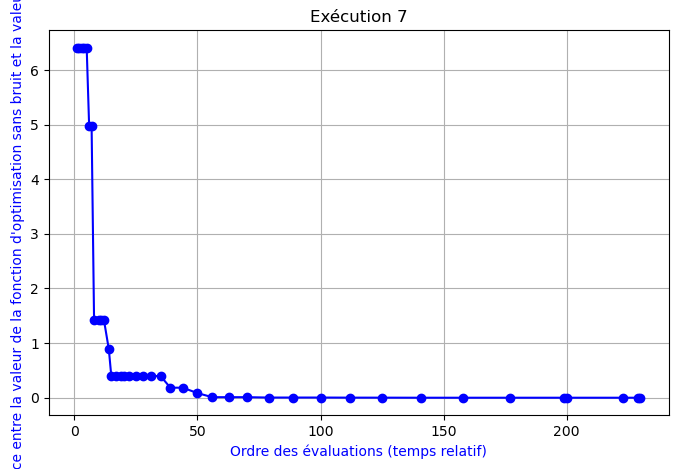

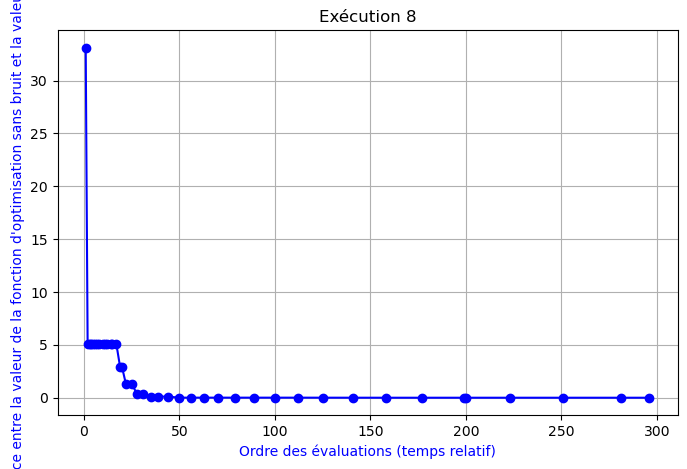

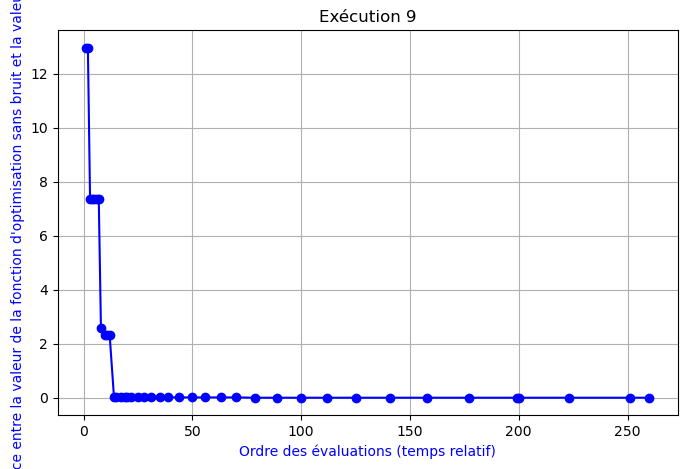

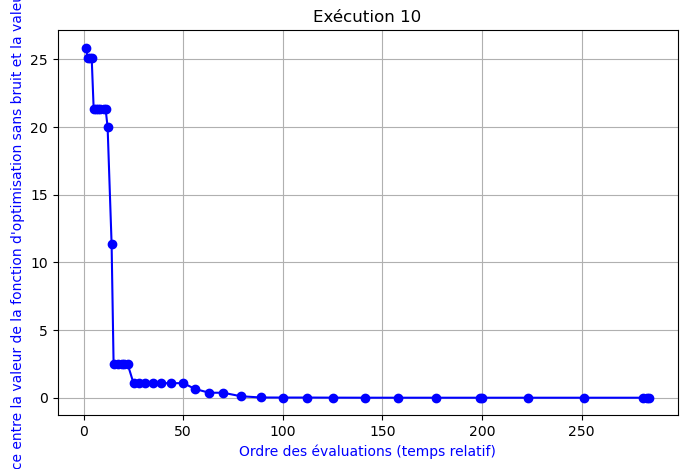

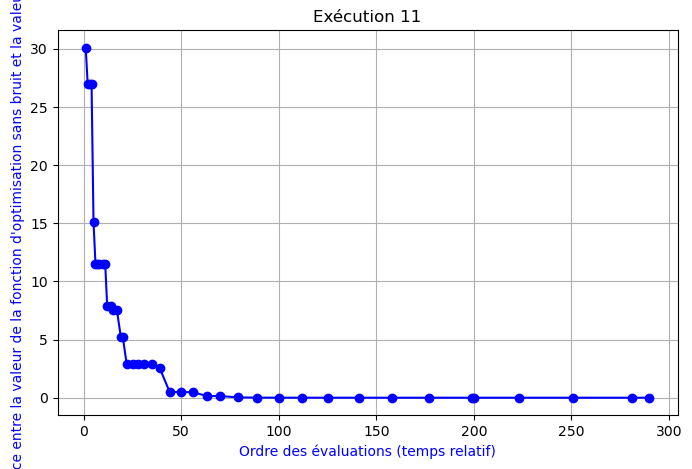

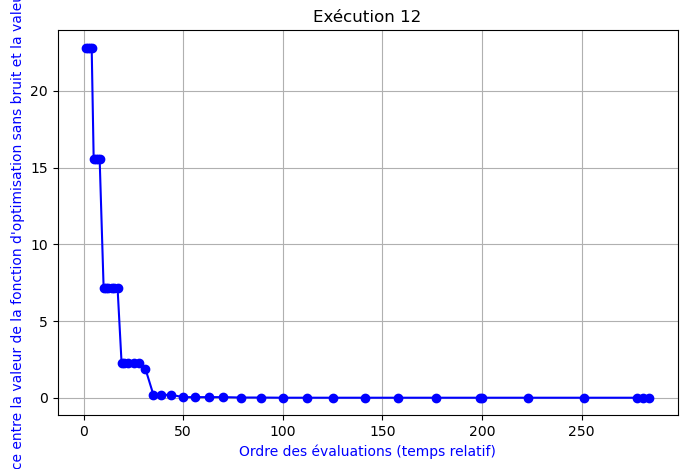

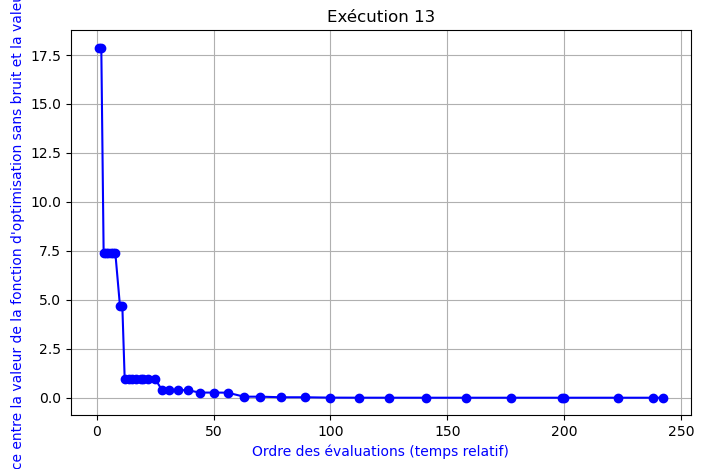

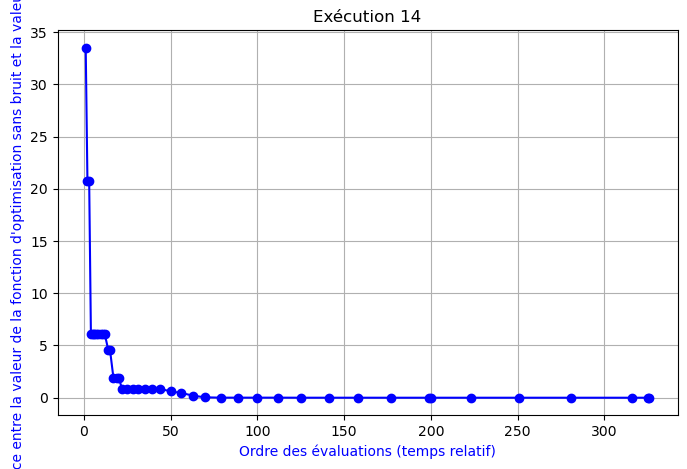

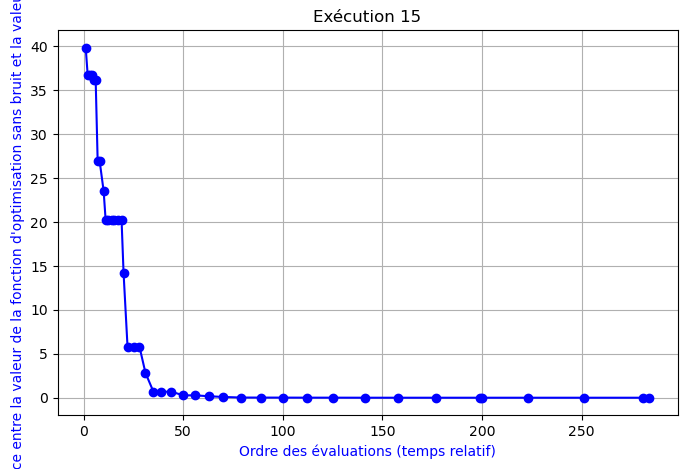

In [2]:
import matplotlib.pyplot as plt

# Ouvrir le fichier .tdat
with open("bbobexp_f1_DIM2.tdat", "r") as f:
    lignes = f.readlines()

# Initialisation des listes pour stocker toutes les exécutions
executions = []
x, y = [], []
debut = False

# Lecture des lignes du fichier
for ligne in lignes:
    ligne = ligne.strip()
    
    if ligne.startswith('% function evaluation | noise-free fitness'):
        debut = True  # Début de l'exécution
        if x and y:
            executions.append((x, y))
            x, y = [], []  # Réinitialisation des listes
    
    elif debut and ligne and not ligne.startswith('%'):
        valeurs = ligne.split()
        x.append(int(valeurs[0]))  # Ordre des évaluations
        y.append(float(valeurs[2]))  # Meilleure différence

# Ajouter la dernière exécution si elle n'a pas été ajoutée
if x and y:
    executions.append((x, y))

# Génération et affichage des figures
for i, (x, y) in enumerate(executions, 1):
    plt.figure(figsize=(8, 5))
    plt.plot(x, y, linestyle="-", marker="o", color="b")
    plt.xlabel("Ordre des évaluations (temps relatif)", color="b")
    plt.ylabel("Différence entre la valeur de la fonction d'optimisation sans bruit et la valeur optimale", color="b")
    plt.title(f"Exécution {i}")
    plt.grid()
    plt.show()

#### 6. Choix d'une agrégation